In [1]:
!pip install -U hopsworks --quie

In [2]:
import pandas as pd #Untuk memasukkan dataset ke dataframe
from sklearn.tree import DecisionTreeClassifier #Memakai algoritma Decision Tree
from sklearn.model_selection import train_test_split #untuk membagi data training dan data testing
# Library dibawah untuk melihat akurasi dll
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [3]:
import hopsworks

import os
os.environ['CONDA_DLL_SEARCH_MODIFICATION_ENABLE'] = '1' #setting the env variable

In [4]:
project = hopsworks.login()
fs = project.get_feature_store()

#aC4NKZxmGgbD2WbO.I7JjlGKs8ushdZsJn4xZpEAchkoG1sA5oySo5vQ4QX5isHrFpIzZhCPQlTRmb2PX

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/20697


Connected. Call `.close()` to terminate connection gracefully.


In [5]:
try: 
    feature_view = fs.get_feature_view(name="agriculture", version=1)
except:
    bawang_fg = fs.get_feature_group(name="agriculture", version=1)
    query = bawang_fg.select_all()
    feature_view = fs.create_feature_view(name="agriculture",
                                      version=1,
                                      description="Read from agriculture dataset",
                                      labels=["label"],
                                      query=query)

In [6]:
#menunjukkan bahwa 20% testing, sementara 80% training.
X_train,X_test,y_train,y_test = feature_view.train_test_split(test_size = 0.2)

2023-06-25 08:47:54,837 INFO: USE `salsa_coe_featurestore`


2023-06-25 08:47:55,574 INFO: SELECT `fg0`.`n` `n`, `fg0`.`p` `p`, `fg0`.`k` `k`, `fg0`.`temperature` `temperature`, `fg0`.`humidity` `humidity`, `fg0`.`ph` `ph`, `fg0`.`rainfall` `rainfall`, `fg0`.`label` `label`
FROM `salsa_coe_featurestore`.`agriculture_1` `fg0`


In [7]:
X_train

,n,p,k,temperature,humidity,ph,rainfall
0,26,51,25,28.764890,52.627415,7.792508,55.216067
1,4,59,25,27.685151,81.942686,6.227134,54.622433
2,59,62,83,18.576659,19.220082,8.104396,72.949404
3,76,44,17,20.416831,62.554248,5.855442,65.277985
4,47,63,16,27.440033,67.104644,6.661871,72.506698
...,...,...,...,...,...,...,...
1195,60,49,44,20.775761,84.497744,6.244841,240.081065
1196,80,18,51,28.053807,91.817588,6.706053,20.765821
1197,59,69,80,19.079377,17.867549,8.165359,69.406191
1198,36,65,16,25.712698,64.112333,7.692014,50.170678


In [8]:
### Klasifikasi menggunakan model algoritma Decision Tree

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

classifier_dt = Pipeline([
    ('model', DecisionTreeClassifier()),
])

In [10]:
parameters = {
               "model__max_depth": np.arange(1,21),
               "model__min_samples_leaf": np.arange(1,102,4),
               "model__min_samples_split": np.arange(2, 11),
               "model__criterion": ['gini','entropy'],
               #"model__max_features": ['auto', 'sqrt', 'log2'],
               "model__random_state" : [42]
}

In [11]:
model = GridSearchCV(classifier_dt, parameters, cv = 3, n_jobs=-1)

In [12]:
model.fit(X_train, y_train.values.ravel());

In [13]:
ori_y_pred_dt_train = model.predict(X_train)
ori_accuracy_dt_train = accuracy_score(y_train, ori_y_pred_dt_train)
print("Accuracy Training set: ", ori_accuracy_dt_train)

ori_y_pred_dt_test = model.predict(X_test)
ori_accuracy_dt_test = accuracy_score(y_test, ori_y_pred_dt_test)
print("Accuracy Test set: ", ori_accuracy_dt_test)

Accuracy Training set:  0.9947916666666666
Accuracy Test set:  0.9875


In [14]:
ori_recall_dt_train = recall_score(average='weighted',y_true=y_train, y_pred=ori_y_pred_dt_train)
print("Recall Training set: ", ori_recall_dt_train)

ori_recall_dt_test = recall_score(average='weighted',y_true=y_test, y_pred=ori_y_pred_dt_test)
print("Recall Test set: ", ori_recall_dt_test)

Recall Training set:  0.9947916666666666
Recall Test set:  0.9875


In [15]:
ori_recall_dt_train = recall_score(average='weighted',y_true=y_train, y_pred=ori_y_pred_dt_train)
print("Recall Training set: ", ori_recall_dt_train)

ori_recall_dt_test = recall_score(average='weighted',y_true=y_test, y_pred=ori_y_pred_dt_test)
print("Recall Test set: ", ori_recall_dt_test)

Recall Training set:  0.9947916666666666
Recall Test set:  0.9875


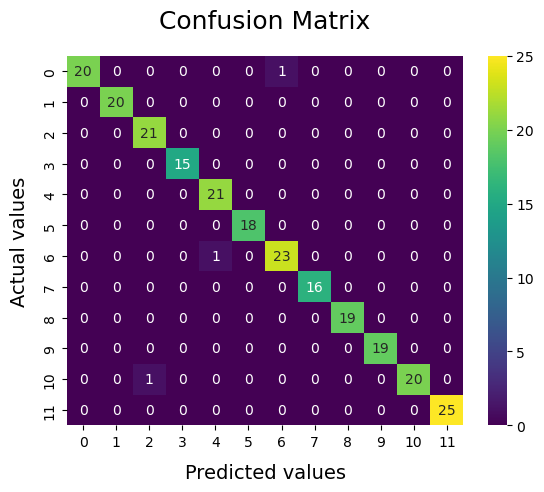

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, ori_y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

In [20]:
y_pred = model.predict(X_test)
y_pred

array(['muskmelon', 'mungbean', 'watermelon', 'kidneybeans', 'chickpea',
       'mothbeans', 'mothbeans', 'watermelon', 'blackgram', 'pigeonpeas',
       'muskmelon', 'chickpea', 'blackgram', 'jute', 'jute', 'watermelon',
       'kidneybeans', 'maize', 'rice', 'watermelon', 'jute', 'lentil',
       'kidneybeans', 'rice', 'rice', 'blackgram', 'muskmelon', 'maize',
       'blackgram', 'jute', 'blackgram', 'maize', 'lentil', 'jute',
       'muskmelon', 'muskmelon', 'mothbeans', 'chickpea', 'blackgram',
       'lentil', 'chickpea', 'maize', 'rice', 'blackgram', 'mothbeans',
       'watermelon', 'muskmelon', 'chickpea', 'chickpea', 'lentil',
       'mungbean', 'maize', 'pigeonpeas', 'maize', 'mungbean', 'mungbean',
       'chickpea', 'kidneybeans', 'jute', 'lentil', 'watermelon',
       'muskmelon', 'mothbeans', 'rice', 'pigeonpeas', 'watermelon',
       'rice', 'watermelon', 'maize', 'watermelon', 'mungbean',
       'watermelon', 'blackgram', 'jute', 'kidneybeans', 'blackgram',
       'mai

In [21]:
from sklearn.metrics import classification_report

metrics = classification_report(y_test, y_pred, output_dict=True)
print(metrics)

{'blackgram': {'precision': 1.0, 'recall': 0.9523809523809523, 'f1-score': 0.975609756097561, 'support': 21}, 'chickpea': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 20}, 'jute': {'precision': 0.9545454545454546, 'recall': 1.0, 'f1-score': 0.9767441860465117, 'support': 21}, 'kidneybeans': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 15}, 'lentil': {'precision': 0.9545454545454546, 'recall': 1.0, 'f1-score': 0.9767441860465117, 'support': 21}, 'maize': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, 'mothbeans': {'precision': 0.9583333333333334, 'recall': 0.9583333333333334, 'f1-score': 0.9583333333333334, 'support': 24}, 'mungbean': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 16}, 'muskmelon': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 19}, 'pigeonpeas': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 19}, 'rice': {'precision': 1.0, 'recall': 0.9523809523809523, 'f1-score': 0.97560

In [17]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, model.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 9
model__min_samples_leaf: 1
model__min_samples_split: 2
model__random_state: 42


In [23]:
from hsml.schema import Schema
from hsml.model_schema import ModelSchema
import os
import joblib
import hopsworks
import shutil

project =  hopsworks.login()
mr = project.get_model_registry()

# will be saved to the model registry
model_dir="agriculture_model"
if os.path.isdir(model_dir) == False:
    os.mkdir(model_dir)
joblib.dump(model, model_dir + "/agriculture_model.pkl")
##shutil.copyfile("assets/confusion_matrix.png", model_dir + "/confusion_matrix.png")

input_example = X_train.sample()
input_schema = Schema(X_train)
output_schema = Schema(y_train)
model_schema = ModelSchema(input_schema, output_schema)

agriculture_model = mr.python.create_model(
    version=1,
    name="agriculture", 
    metrics={"accuracy" : metrics['accuracy']},
    model_schema=model_schema,
    input_example=input_example, 
    description="Agriculture Predictor")

agriculture_model.save(model_dir)

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/20697
Connected. Call `.close()` to terminate connection gracefully.


  0%|          | 0/6 [00:00<?, ?it/s]

Model created, explore it at https://c.app.hopsworks.ai:443/p/20697/models/agriculture/1


Model(name: 'agriculture', version: 1)